In [1]:
import pandas as pd
import pickle
churn = pd.read_csv("C:/Users/E002891/Desktop/DayWiseTracker/Programming Concepts/Data Science/Capstone Prj/Churn_MV.csv")
churn.head(5)

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,...,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,128.0,25.0,265.1,197.4,244.7,10.0,1.0,0.0,0.0,1.0,...,45.07,99.0,16.78,91.0,11.01,3.0,2.7,KS,415.0,382-4657
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,107.0,26.0,161.6,195.5,254.4,13.7,1.0,0.0,0.0,1.0,...,27.47,103.0,16.62,103.0,11.45,3.0,3.7,OH,415.0,371-7191
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
churn=churn.dropna(how='all')
churn.reset_index(drop=True,inplace=True)
churn.head(5)

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,...,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128.0,25.0,265.1,197.4,244.7,10.0,1.0,0.0,0.0,1.0,...,45.07,99.0,16.78,91.0,11.01,3.0,2.70,KS,415.0,382-4657
1,107.0,26.0,161.6,195.5,254.4,13.7,1.0,0.0,0.0,1.0,...,27.47,103.0,16.62,103.0,11.45,3.0,3.70,OH,415.0,371-7191
2,137.0,0.0,243.4,121.2,162.6,12.2,0.0,0.0,0.0,0.0,...,41.38,110.0,10.30,104.0,7.32,5.0,3.29,NJ,415.0,358-1921
3,84.0,0.0,299.4,61.9,196.9,6.6,2.0,0.0,1.0,0.0,...,50.90,88.0,5.26,89.0,8.86,7.0,1.78,OH,408.0,375-9999
4,75.0,0.0,166.7,148.3,186.9,10.1,3.0,0.0,1.0,0.0,...,28.34,122.0,12.61,121.0,8.41,3.0,2.73,OK,415.0,330-6626


In [150]:
churn.isna().sum()

Account Length       0
VMail Message        0
Day Mins             0
Eve Mins             0
Night Mins           0
Intl Mins            0
CustServ Calls       0
Churn                0
Intl Plan            0
VMail Plan           0
Day Calls            0
Day Charge           0
Daily Charges MV    50
Eve Calls            0
Eve Charge           0
Night Calls          0
Night Charge         0
Intl Calls           0
Intl Charge          0
State                0
Area Code            0
Phone                0
dtype: int64

In [151]:
churn.describe()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,Day Calls,Day Charge,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3283.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,0.096910,0.276628,100.435644,30.562307,30.533475,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,0.295879,0.447398,20.069084,9.259435,9.205538,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,0.000000,87.000000,24.430000,24.420000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,0.000000,101.000000,30.500000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,0.000000,1.000000,114.000000,36.790000,36.745000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,1.000000,165.000000,59.640000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


### <font color=red> Check Class imbalance

In [7]:
churn.Churn.value_counts()

0.0    2850
1.0     483
Name: Churn, dtype: int64

In [8]:
churn.Churn.value_counts()[0]/churn.Churn.value_counts()[1]

5.900621118012422

##### Separate response column

In [3]:
inputs = churn.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18]]
response = churn.iloc[:,7]
inputs.head(3)

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,Day Charge,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
0,128.0,25.0,265.1,197.4,244.7,10.0,1.0,0.0,1.0,110.0,45.07,45.07,99.0,16.78,91.0,11.01,3.0,2.70
1,107.0,26.0,161.6,195.5,254.4,13.7,1.0,0.0,1.0,123.0,27.47,27.47,103.0,16.62,103.0,11.45,3.0,3.70
2,137.0,0.0,243.4,121.2,162.6,12.2,0.0,0.0,0.0,114.0,41.38,41.38,110.0,10.30,104.0,7.32,5.0,3.29


##### Dividing the categorical and numerical columns

In [4]:
catCols = inputs.loc[:,["Intl Plan","VMail Plan"]] #Without response variable
numCols = inputs.iloc[:,[0,1,2,3,4,5,6,9,10,11,12,13,14,15,16,17]]
numCols.head(2)

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
0,128.0,25.0,265.1,197.4,244.7,10.0,1.0,110.0,45.07,45.07,99.0,16.78,91.0,11.01,3.0,2.7
1,107.0,26.0,161.6,195.5,254.4,13.7,1.0,123.0,27.47,27.47,103.0,16.62,103.0,11.45,3.0,3.7


### <font color=red>Preprocessing

##### <font color=red> Imputation

In [8]:
numCols["Daily Charges MV"].isna().sum()

50

In [45]:
a=numCols["Daily Charges MV"].fillna(numCols["Daily Charges MV"].mean())

In [46]:
sum(a-numCols["Day Charge"])

-96.09622601279173

In [47]:
b=numCols["Daily Charges MV"].fillna(numCols["Daily Charges MV"].median())

In [48]:
sum(b-numCols["Day Charge"])

-97.77000000000004

In [52]:
sum(c-numCols["Day Charge"])

nan

In [25]:
from sklearn.neighbors import knn_impute
d=knn_impute(target=numCols["Daily Charges MV"],k_neighbours=10)

ImportError: cannot import name 'knn_impute'

In [28]:
from fancyimpute import KNN
fancyimpute.kNN(k=x).complete(data matrix)

ModuleNotFoundError: No module named 'fancyimpute'

In [5]:
nulComs_Daily_na = numCols[numCols["Daily Charges MV"].isna()]
nulComs_Daily_notna = numCols[numCols["Daily Charges MV"].notna()]

In [12]:
nulComs_Daily_na.head(4)

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
6,121.0,24.0,218.2,348.5,212.6,7.5,3.0,88.0,37.09,NaN,108.0,29.62,118.0,9.57,7.0,2.03
11,74.0,0.0,187.7,163.4,196.0,9.1,0.0,127.0,31.91,NaN,148.0,13.89,94.0,8.82,5.0,2.46
15,161.0,0.0,332.9,317.8,160.6,5.4,4.0,67.0,56.59,NaN,97.0,27.01,128.0,7.23,9.0,1.46
39,149.0,0.0,140.4,271.8,188.3,11.1,1.0,94.0,23.87,NaN,92.0,23.10,108.0,8.47,9.0,3.00


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np
X=nulComs_Daily_notna.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12,13,14,15]]
y=nulComs_Daily_notna.iloc[:,9]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
print(np.sqrt(np.mean((y_test-y_preds)**2)))

# mean_absolute_error(y_test,lr.predict(X_test))



1.3620219550942833e-14


In [7]:
lr.predict(nulComs_Daily_na.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12,13,14,15]])

array([37.09, 31.91, 56.59, 23.87, 29.43, 21.22, 14.59, 40.09, 26.71,
       51.05, 10.47, 21.13, 42.99, 30.45, 28.99, 40.48, 47.84, 31.14,
       34.85, 25.25, 57.36, 26.79, 31.64, 41.45, 53.04, 44.61, 35.12,
       37.64, 37.21, 35.  , 30.11, 15.64, 39.75, 10.98, 32.79, 20.81,
       38.34, 16.42, 16.69,  7.65, 29.24, 20.81, 24.51, 34.9 , 30.91,
       51.07, 28.8 , 44.42, 54.83, 28.1 ])

In [8]:
nulComs_Daily_na.iloc[:,9]=lr.predict(nulComs_Daily_na.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12,13,14,15]])

C:\Users\E002891\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [160]:
len(nulComs_Daily_notna)

3283

In [9]:
a=nulComs_Daily_na
b=nulComs_Daily_notna
numColsNew=pd.concat([a,b],axis=0)


In [10]:
numColsNew.reset_index(drop=True,inplace=True)
numColsNew.head(3)

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
0,121.0,24.0,218.2,348.5,212.6,7.5,3.0,88.0,37.09,37.09,108.0,29.62,118.0,9.57,7.0,2.03
1,74.0,0.0,187.7,163.4,196.0,9.1,0.0,127.0,31.91,31.91,148.0,13.89,94.0,8.82,5.0,2.46
2,161.0,0.0,332.9,317.8,160.6,5.4,4.0,67.0,56.59,56.59,97.0,27.01,128.0,7.23,9.0,1.46


In [356]:
numColsNew.isna().sum()

Account Length      0
VMail Message       0
Day Mins            0
Eve Mins            0
Night Mins          0
Intl Mins           0
CustServ Calls      0
Day Calls           0
Day Charge          0
Daily Charges MV    0
Eve Calls           0
Eve Charge          0
Night Calls         0
Night Charge        0
Intl Calls          0
Intl Charge         0
dtype: int64

##### Check RMSE from expected column

In [11]:
print(np.sqrt((numColsNew["Day Charge"]-numColsNew["Daily Charges MV"])**2).mean())

1.8333835966207207e-16


##### Outlier Management

In [12]:
numColsNames = ['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',\
       'Intl Mins', 'CustServ Calls', 'Day Calls', 'Day Charge',\
       'Daily Charges MV', 'Eve Calls', 'Eve Charge', 'Night Calls',\
       'Night Charge', 'Intl Calls', 'Intl Charge']
numColsNew.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Day Calls', 'Day Charge',
       'Daily Charges MV', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge'],
      dtype='object')

In [13]:
from matplotlib import pyplot as pt
numColsNew.loc[:,(numColsNew.dtypes=='float64') | (numColsNew.dtypes=='int64')].hist(figsize=[11,11])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CF2BEB8>,
      dtype=object)

In [23]:
numColsNew.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Day Calls', 'Day Charge',
       'Daily Charges MV', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge'],
      dtype='object')

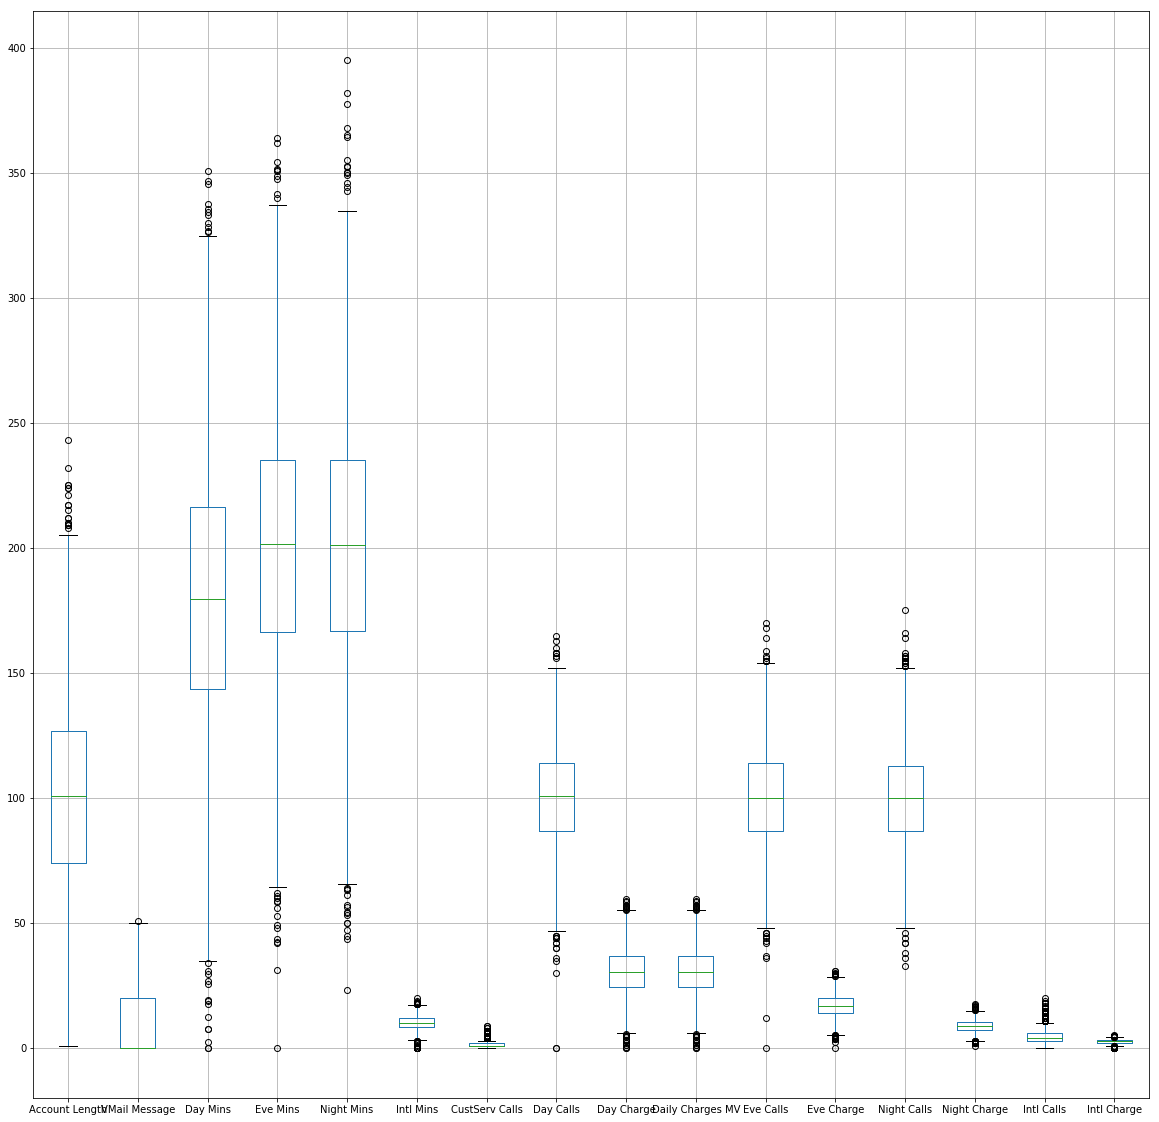

In [24]:
from matplotlib import pyplot as plt
numColsNew.boxplot(column=numColsNames,figsize=[20,20])

In [14]:
a=[x for x in numColsNew["Account Length"].values if(x>125)]
len(a)

882

In [23]:
numColsNew.head(3)

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
0,121.0,24.0,218.2,348.5,212.6,7.5,3.0,88.0,37.09,37.09,108.0,29.62,118.0,9.57,7.0,2.03
1,74.0,0.0,187.7,163.4,196.0,9.1,0.0,127.0,31.91,31.91,148.0,13.89,94.0,8.82,5.0,2.46
2,161.0,0.0,332.9,317.8,160.6,5.4,4.0,67.0,56.59,56.59,97.0,27.01,128.0,7.23,9.0,1.46


##### Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
scaledCols = ms.fit_transform(numColsNew)
scaledCols = pd.DataFrame(scaledCols,index = numColsNew.index, columns=numColsNew.columns)
scaledCols.head(3)

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
0,0.495868,0.470588,0.622007,0.958207,0.509414,0.375,0.333333,0.533333,0.621898,0.621898,0.635294,0.958266,0.598592,0.509863,0.35,0.375926
1,0.301653,0.000000,0.535063,0.449271,0.464766,0.455,0.000000,0.769697,0.535044,0.535044,0.870588,0.449369,0.429577,0.465033,0.25,0.455556
2,0.661157,0.000000,0.948974,0.873797,0.369554,0.270,0.444444,0.406061,0.948860,0.948860,0.570588,0.873827,0.669014,0.369994,0.45,0.270370


##### Outliers Replacement by +-3sigma values

In [27]:
def getOutliersIndex(x):
    mean_=x.mean()
    sd_=x.std()
    upper = (3*sd_)+mean_
    lower = mean_-(3*sd_)
    y = [i for i in range(len(x)) if(x.iloc[i]>upper or x.iloc[i] <lower)]
    return [y,upper,lower]

getOutliersIndex(scaledCols["Account Length"])

[[432, 819, 1408, 1551, 1751, 1886, 3216],
 0.9071534060596462,
 -0.0801715343187544]

##### Outliers replacement by 1.5+IQR

In [16]:
def getOutliersIndexIQR(x):
    q3=x.quantile(q=0.75)
    q1=x.quantile(q=0.25)
    iqr=q3-q1
    upper=q3+(1.5*iqr)
    lower=q1-(1.5*iqr)
    y=[i for i in range(len(x)) if(x.iloc[i]>upper)]
    x.iloc[y]=upper
    z=[i for i in range(len(x)) if(x.iloc[i]<lower)]
    x.iloc[z]=lower
    return x

18

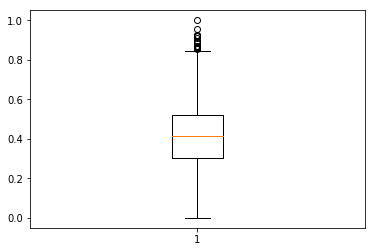

In [17]:
#Just checking if the above function is correct
import matplotlib.pyplot as pt
pt.boxplot(scaledCols["Account Length"])
len(scaledCols.loc[scaledCols["Account Length"]>0.849,:])

In [160]:
#Doubt: Shd we replace/remove outliers/build another model for outliers
#Can we apply Lin Reg to replace outliers
#Minmax or zscore

In [18]:
#Replacing by max values. i.e. q3+1.5IQR
scaledCols["Account Length"]=getOutliersIndexIQR(scaledCols["Account Length"])

{'boxes': [<matplotlib.lines.Line2D at 0xe144748>],
 'caps': [<matplotlib.lines.Line2D at 0xe14d198>,
 'fliers': [<matplotlib.lines.Line2D at 0xe14de10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xe14d9e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0xe144898>,
  <matplotlib.lines.Line2D at 0xe144d30>]}

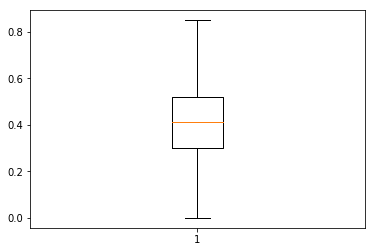

In [29]:
pt.boxplot(scaledCols["Account Length"])

In [19]:
scaledCols["VMail Message"]=getOutliersIndexIQR(scaledCols["VMail Message"])

{'boxes': [<matplotlib.lines.Line2D at 0xe1a40f0>],
 'caps': [<matplotlib.lines.Line2D at 0xe1a4b00>,
 'fliers': [<matplotlib.lines.Line2D at 0xe1ac7b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xe1ac390>],
 'whiskers': [<matplotlib.lines.Line2D at 0xe1a4240>,
  <matplotlib.lines.Line2D at 0xe1a46d8>]}

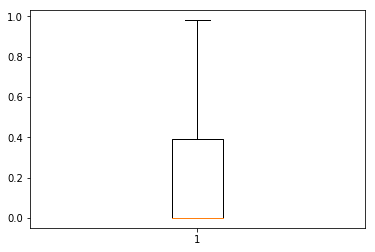

In [31]:
pt.boxplot(scaledCols["VMail Message"])

In [20]:
scaledCols["Day Mins"] =  getOutliersIndexIQR(scaledCols["Day Mins"])

In [20]:
scaledCols.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Day Calls', 'Day Charge',
       'Daily Charges MV', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge'],
      dtype='object')

In [21]:
scaledCols['Eve Mins'] =  getOutliersIndexIQR(scaledCols['Eve Mins'])

In [22]:
scaledCols['Night Mins']=  getOutliersIndexIQR(scaledCols['Night Mins'])

In [23]:
scaledCols['Intl Mins']=  getOutliersIndexIQR(scaledCols['Intl Mins'])

In [24]:
for i in range(6,len(scaledCols.columns)):
    scaledCols.iloc[:,i] = getOutliersIndexIQR(scaledCols.iloc[:,i])

In [37]:
[scaledCols.iloc[:,i].name for i in range(6,len(scaledCols.columns))]

['CustServ Calls',
 'Day Calls',
 'Day Charge',
 'Daily Charges MV',
 'Eve Calls',
 'Eve Charge',
 'Night Calls',
 'Night Charge',
 'Intl Calls',
 'Intl Charge']

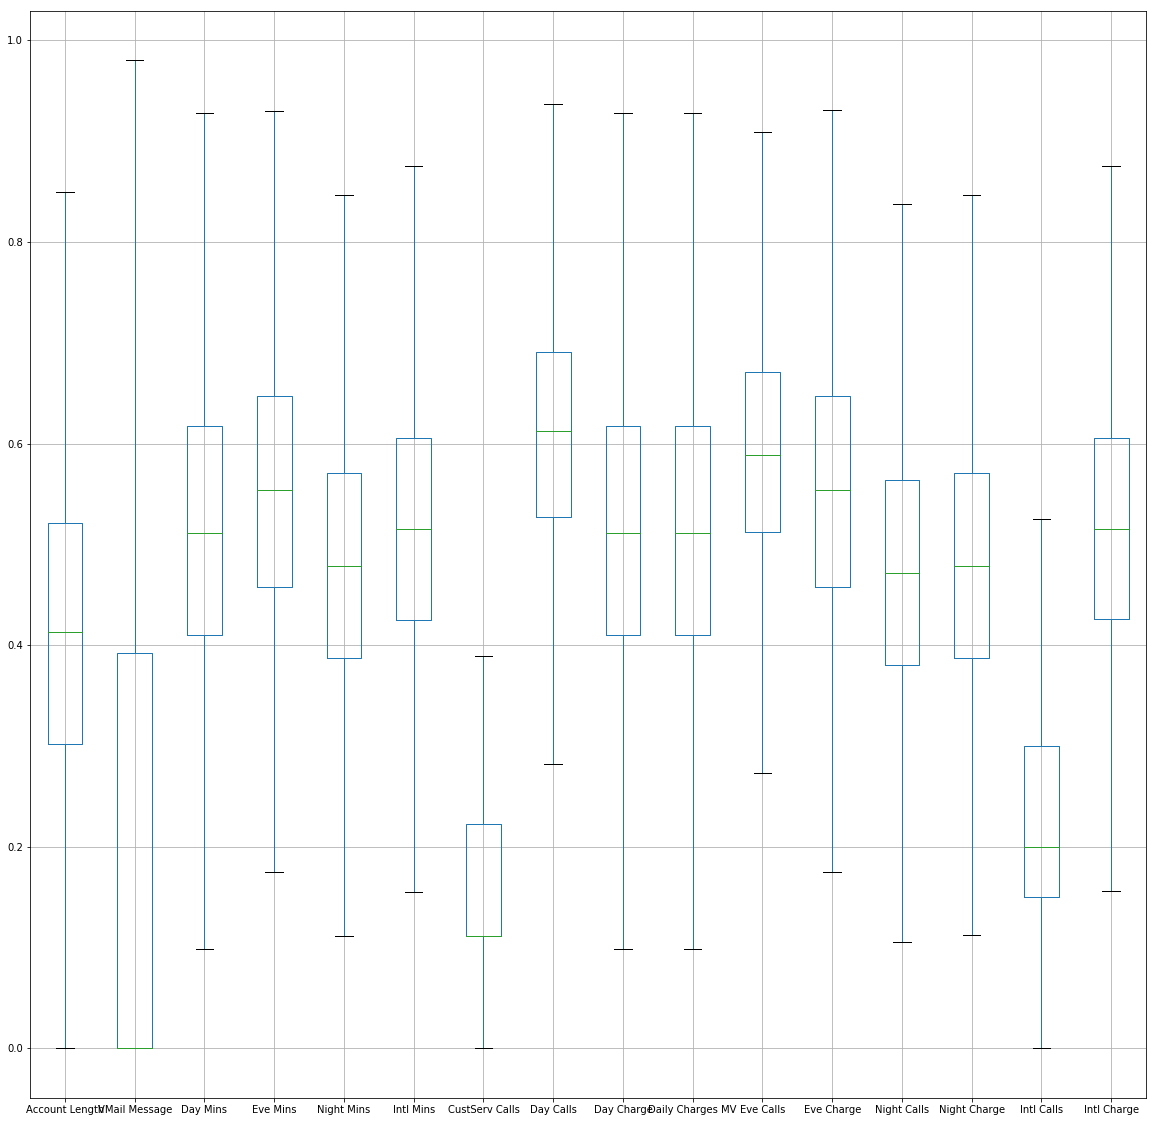

In [38]:
scaledCols.boxplot(column=scaledCols.columns.tolist(),figsize=[20,20])

### <font color=red>EDA

##### Histogram

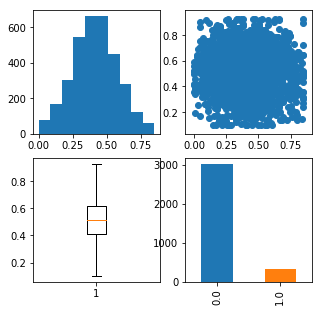

In [25]:
import matplotlib.pyplot as pt

fig=pt.figure(figsize=[5,5])
ax=fig.add_subplot(2,2,1)
ax.hist(scaledCols["Account Length"])

bx=fig.add_subplot(2,2,2)
bx.scatter(scaledCols["Account Length"],scaledCols["Daily Charges MV"])

cx=fig.add_subplot(2,2,3)
cx.boxplot(scaledCols["Daily Charges MV"])

dx=fig.add_subplot(2,2,4)
# test=churn.groupby(["Intl Plan","Intl Charge"])
test=catCols["Intl Plan"].value_counts()
test.plot(kind="bar")
pt.show()

##### Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DB44BA8>,
      dtype=object)

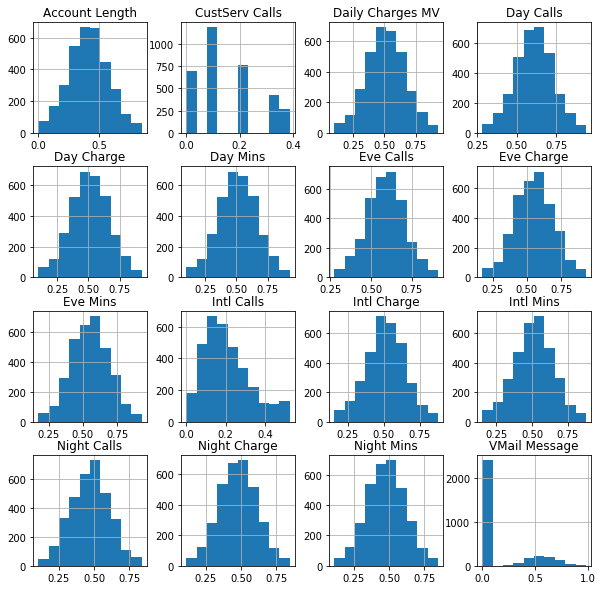

In [26]:
scaledCols.hist(figsize=[10,10])

In [27]:
# scaledCols["VMail Message"].quantile(q=0.25)-(1.5*(scaledCols["VMail Message"].quantile(q=0.75)-scaledCols["VMail Message"].quantile(q=0.25)))
scaledCols.loc[scaledCols["VMail Message"]==0,"VMail Message"].value_counts()

0.0    2411
Name: VMail Message, dtype: int64

In [28]:
len(scaledCols.loc[scaledCols["VMail Message"]>0,"VMail Message"])

922

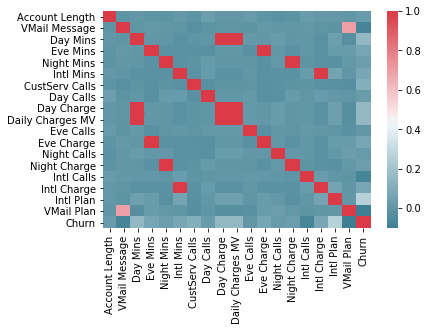

In [29]:
corr=pd.concat([scaledCols,catCols,response],axis=1).corr()
import seaborn as sns
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap=cmap)

In [147]:
corr.head(3)

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Intl Plan,VMail Plan,Churn
Account Length,1.000000,-0.004007,0.007016,-0.006579,-0.009674,0.012501,-0.004441,0.038608,0.007014,0.007014,0.018693,-0.006568,-0.013312,-0.009671,0.023650,0.012563,0.010821,0.00263,0.024984
VMail Message,-0.004007,1.000000,0.000998,0.017163,0.007660,0.001004,-0.020620,-0.010258,0.000995,0.000995,-0.006833,0.017180,0.007091,0.007638,0.010168,0.001014,-0.007698,0.69603,-0.078764
Day Mins,0.007016,0.000998,1.000000,0.006675,0.003231,-0.011832,-0.006585,0.002755,1.000000,1.000000,0.016928,0.006661,0.023330,0.003205,0.007595,-0.011773,0.041677,-0.02492,0.152310


Text(0,0.5,'Intl Plan')

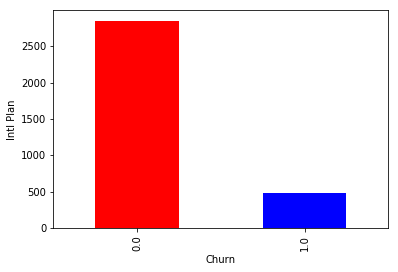

In [43]:
full=pd.concat([scaledCols,catCols,response],axis=1)
fig=pt.figure()
ax=fig.add_subplot(1,1,1)
temp=full.groupby(full["Churn"])["Intl Plan"].count()
temp.plot(kind="bar",color=["red","blue"])
ax.set_xlabel("Churn")
ax.set_ylabel("Intl Plan")

In [44]:
import matplotlib.pyplot as plt
# p1 = plt.bar(ind, menMeans, width, yerr=menStd)

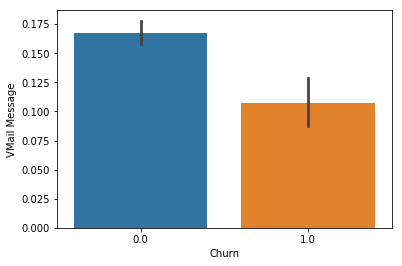

In [45]:
import seaborn as sns
sns.barplot(x="Churn",y="VMail Message",data=full)

Text(0,0.5,'Count')

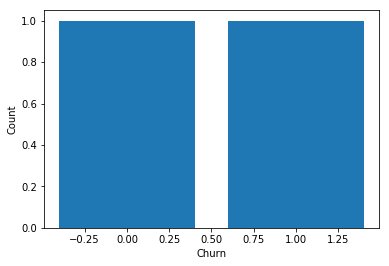

In [33]:
full=pd.concat([scaledCols,catCols,response],axis=1)
fig=pt.figure()
ax=fig.add_subplot(1,1,1)
# temp=full["Churn"].value_counts()
# temp=full.groupby(full["Churn"].value_counts())["Intl Plan"].count()
# temp.plot(kind="bar",color=["red","blue"])
pt.bar(full["Churn"],full["Intl Plan"])
ax.set_xlabel("Churn")
ax.set_ylabel("Count")

In [49]:
a=full.loc[full.Churn==1,:]
b=a.loc[a["Intl Plan"]==1,:]
print(len(b))
print(len(a))
print("Customers having Intl plan and churned out % is",len(b)/len(a))

137
483
Customers having Intl plan and churned out % is 0.2836438923395445


In [50]:
a=full.loc[full.Churn==0,:]
b=a.loc[a["Intl Plan"]==0,:]
print(len(b))
print(len(a))
print("Customers having Intl plan and churned out % is",len(b)/len(a))

2664
2850
Customers having Intl plan and churned out % is 0.9347368421052632


In [140]:
2850 - 2664

186

In [191]:
a=full.loc[full.Churn==1,:]
b=a.loc[a["Intl Plan"]==0,:]
print(len(b))
print(len(a))
print("Customers not having Intl plan and churned out % is",len(b)/len(a))

346
483
Customers not having Intl plan and churned out % is 0.7163561076604554


In [192]:
a=full.loc[full.Churn==0,:]
b=a.loc[a["VMail Message"]!=0,:]
print(len(b))
print(len(a))
print("Customers who have not churned and sent voice message % is",len(b)/len(a))

834
2850
Customers who have not churned and sent voice message % is 0.2926315789473684


In [193]:
a=full.loc[full.Churn==1]
b=a.loc[a["VMail Message"]!=0,:]
print("Customers who have churned and sent voice message % is",len(b)/len(a))

Customers who have churned and sent voice message % is 0.18219461697722567


In [194]:
a=full.loc[full.Churn==0]
b=a.loc[a["Account Length"]!=0,:]
print("Customers who have churned and sent voice message % is",len(b)/len(a))

Customers who have churned and sent voice message % is 0.9975438596491228


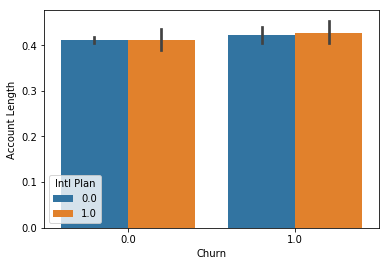

In [51]:
sns.barplot(x="Churn",y="Account Length",hue="Intl Plan",data=full)

In [57]:
sns.countplot(x="Churn",y="Account Length",data=full)

TypeError: Cannot pass values for both `x` and `y`

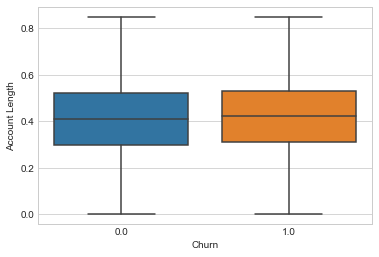

In [52]:
sns.set_style("whitegrid")
sns.boxplot("Churn","Account Length",data=full)

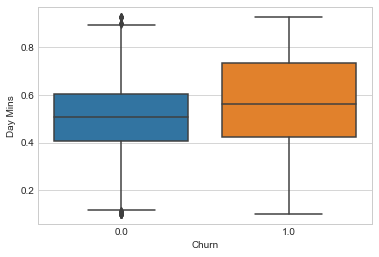

In [60]:
import seaborn as sns
sns.boxplot(x="Churn",y="Day Mins",data=full)

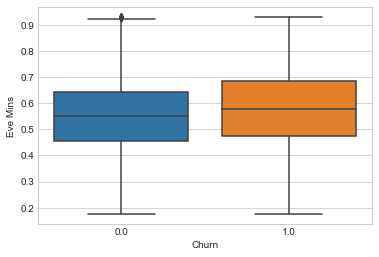

In [61]:
sns.boxplot(x="Churn",y="Eve Mins",data=full)

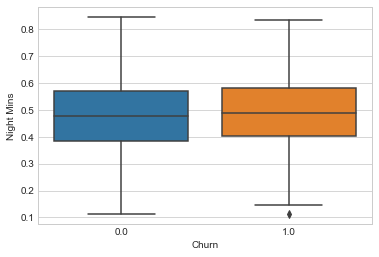

In [62]:
sns.boxplot(x="Churn",y="Night Mins",data=full)

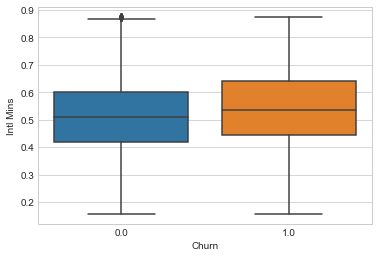

In [63]:
sns.boxplot(x="Churn",y="Intl Mins",data=full)

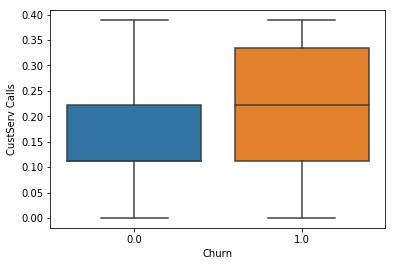

In [55]:
sns.boxplot(x="Churn",y="CustServ Calls",data=full)

# a=full.loc[full["Churn"]==1,"CustServ Calls"].mean()
# a

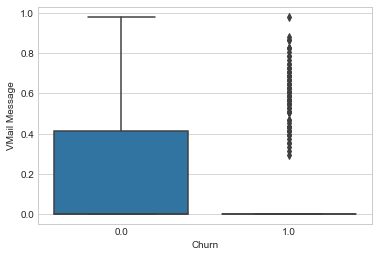

In [65]:
sns.boxplot(x="Churn",y="VMail Message",data=full)

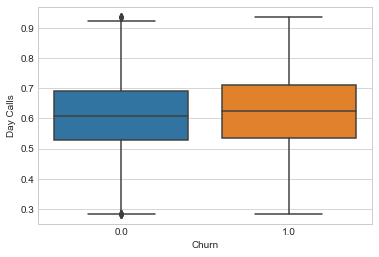

In [66]:
sns.boxplot(x="Churn",y="Day Calls",data=full)

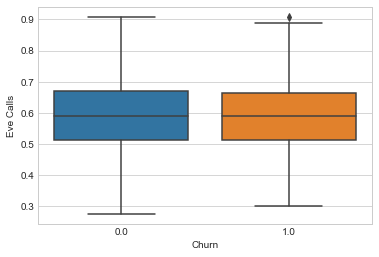

In [67]:
sns.boxplot(x="Churn",y="Eve Calls",data=full)

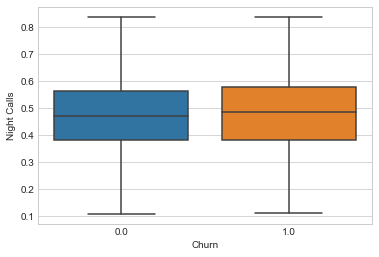

In [68]:
sns.boxplot(x="Churn",y="Night Calls",data=full)

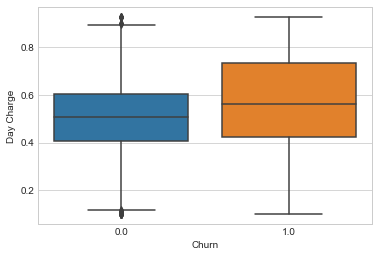

In [69]:
sns.boxplot(x="Churn",y="Day Charge",data=full)

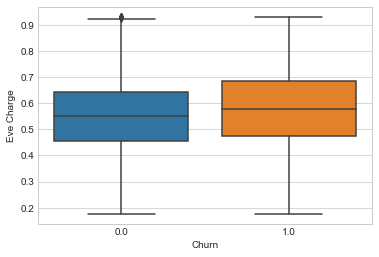

In [70]:
sns.boxplot(x="Churn",y="Eve Charge",data=full)

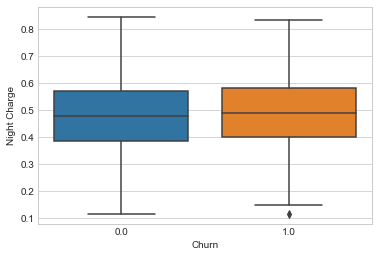

In [71]:
sns.boxplot(x="Churn",y="Night Charge",data=full)

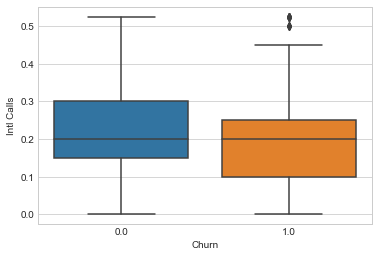

In [72]:
sns.boxplot(x="Churn",y="Intl Calls",data=full)

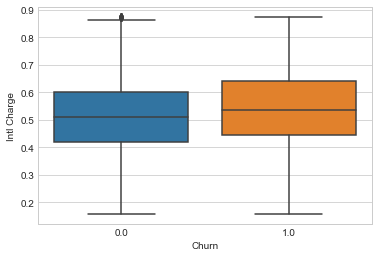

In [73]:
sns.boxplot(x="Churn",y="Intl Charge",data=full)

In [85]:
full.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Day Calls', 'Day Charge',
       'Daily Charges MV', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge', 'Churn', 'Intl Plan_1.0',
       'VMail Plan_1.0'],
      dtype='object')

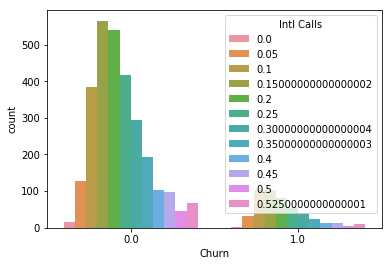

In [37]:
sns.countplot(x="Churn",hue="Intl Calls",data=full)

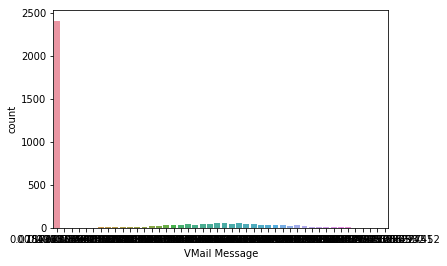

In [34]:
sns.countplot(x="VMail Message",data=full)

In [53]:
#same as all box plots above
full.groupby("Churn").mean() 

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Intl Plan,VMail Plan
Churn,,,,,,,,,,,,,,,,,,
0.0,0.411552,0.167499,0.502911,0.548855,0.475980,0.508754,0.158480,0.607541,0.502887,0.502887,0.588738,0.548941,0.471334,0.476255,0.224754,0.508864,0.065263,0.295439
1.0,0.423177,0.107457,0.569693,0.575248,0.488204,0.536180,0.196802,0.617134,0.569664,0.569664,0.590714,0.575339,0.479544,0.488479,0.200518,0.536280,0.283644,0.165631


In [88]:
full.Churn.value_counts()

0.0    2850
1.0     483
Name: Churn, dtype: int64

In [35]:
fullexp=full
# fullexp["Total Charge"]=fullexp["Day Charge"]+fullexp["Eve Charge"]+fullexp["Night Charge"]+fullexp["Intl Charge"]
# print(fullexp["Total Charge"][0:3])
print(fullexp.groupby("Churn")["Account Length"].mean())
# print(full.groupby("Churn").mean())

Churn
0.0    0.411552
1.0    0.423177
Name: Account Length, dtype: float64


##### Interpretations

Customers not having Intl pan and churned out is more than having intl plan and churned<br/>
Customers who have not churned and sent voice message is more than who have churned<br/>
Customers who have churned they had long day,eve and intl time call<br/>
Customers who have churned they had more cust servc calls<br/>
The most loyal customers are churning out more

In [36]:
full_model=pd.get_dummies(columns=["Intl Plan","VMail Plan"],data=full,drop_first=True)
full_model.head(2)

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Churn,Intl Plan_1.0,VMail Plan_1.0
0,0.495868,0.470588,0.622007,0.930300,0.509414,0.375,0.333333,0.533333,0.621898,0.621898,0.635294,0.930443,0.598592,0.509863,0.35,0.375926,0.0,0,1
1,0.301653,0.000000,0.535063,0.449271,0.464766,0.455,0.000000,0.769697,0.535044,0.535044,0.870588,0.449369,0.429577,0.465033,0.25,0.455556,0.0,0,1


### <font color=red>Sampling and Modelling

##### Random Sampling/Up Sampling, Down Sampling/Stratified Sampling

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cols=['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',\
       'Intl Mins', 'CustServ Calls', 'Day Calls', 'Day Charge',\
       'Daily Charges MV', 'Eve Calls', 'Eve Charge', 'Night Calls',\
       'Night Charge', 'Intl Calls', 'Intl Charge', 'Intl Plan_1.0', 'VMail Plan_1.0']
X=full_model.loc[:,cols]
y=full_model.loc[:,"Churn"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=173)
log=LogisticRegression(penalty="l2",C=1)
result=log.fit(X_train,y_train)
y_preds=log.predict(X_train)
print(classification_report(y_train,y_preds))

y_preds1=log.predict(X_test)
print(classification_report(y_test,y_preds1))

C:\Users\E002891\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


             precision    recall  f1-score   support

        0.0       0.87      0.99      0.92      2282
        1.0       0.57      0.11      0.18       384

avg / total       0.82      0.86      0.82      2666

             precision    recall  f1-score   support

        0.0       0.87      0.99      0.92       568
        1.0       0.68      0.15      0.25        99

avg / total       0.84      0.86      0.82       667



##### Feature Importances

In [57]:
a=[(log.coef_[0][i])*(full_model.iloc[:,i].std()) for i in range(log.coef_.size)]
pd.Series(a, index=full_model.columns[0:18]).sort_values(ascending=False)

Churn               0.613315
CustServ Calls      0.280741
Day Mins            0.124130
Day Charge          0.124039
Daily Charges MV    0.124039
Intl Charge         0.077468
Intl Mins           0.076853
Eve Charge          0.054457
Eve Mins            0.054247
Account Length      0.042472
Night Mins          0.020906
Night Charge        0.020752
Night Calls         0.009877
Day Calls          -0.012877
Eve Calls          -0.036353
VMail Message      -0.056505
Intl Plan_1.0      -0.209879
Intl Calls         -0.249332
dtype: float64

In [61]:
[print(full_model.columns[i],"  ",(log.coef_[0][i]*full_model.iloc[:,i].std())) for i in range(log.coef_.size)]

Account Length    0.042472327079032306
VMail Message    -0.056505289090354786
Day Mins    0.1241298232491606
Eve Mins    0.054246813164337514
Night Mins    0.02090556508149612
Intl Mins    0.07685345227472276
CustServ Calls    0.2807407236612938
Day Calls    -0.012877172011975233
Day Charge    0.12403852828478311
Daily Charges MV    0.12403852828478311
Eve Calls    -0.03635250082024821
Eve Charge    0.05445724701313189
Night Calls    0.009876771044958146
Night Charge    0.02075210905509491
Intl Calls    -0.2493324718116244
Intl Charge    0.07746808803385345
Churn    0.6133153436757298
Intl Plan_1.0    -0.20987934568113023


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [220]:
a=list()
[a.append([full_model.columns[i],(log.coef_[0][i]*full_model.iloc[:,i].std())]) for i in range(log.coef_.size)]
a

[['Account Length', 0.04060946999563242],
 ['VMail Message', -0.008863409259426929],
 ['Day Mins', 0.12611941850229644],
 ['Eve Mins', 0.060103504479309386],
 ['Night Mins', 0.03144973588704098],
 ['Intl Mins', 0.05902768885268024],
 ['CustServ Calls', 0.23090414919690216],
 ['Day Calls', -0.02168480970004853],
 ['Day Charge', 0.12609511454832623],
 ['Daily Charges MV', 0.12609511454832623],
 ['Eve Calls', -0.03227296635047839],
 ['Eve Charge', 0.060363885535880735],
 ['Night Calls', 0.013056721594848305],
 ['Night Charge', 0.03149530719422845],
 ['Intl Calls', -0.19658086009410566],
 ['Intl Charge', 0.06031801956237412],
 ['Churn', 0.599262979957734],
 ['Intl Plan_1.0', -0.20796633086295527]]

In [59]:
print(confusion_matrix(y_test,y_preds1))

[[561   7]
 [ 84  15]]


In [60]:
print(classification_report(y_test,y_preds1))

             precision    recall  f1-score   support

        0.0       0.87      0.99      0.92       568
        1.0       0.68      0.15      0.25        99

avg / total       0.84      0.86      0.82       667



##### Up Sampling

In [38]:
print(len(full_model[full_model["Churn"]==0]))
print(len(full_model[full_model["Churn"]==1]))

2850
483


In [39]:
from sklearn.utils import resample
majority_class = full_model[full_model["Churn"]==0]
minority_class = full_model[full_model["Churn"]==1]
minority_class_updated = resample(minority_class,n_samples=2850,replace=True,random_state=1234)
len(minority_class_updated)
full_model_upsampled=pd.concat([majority_class,minority_class_updated],axis=0)
full_model_upsampled["Churn"].value_counts()

1.0    2850
0.0    2850
Name: Churn, dtype: int64

In [40]:
X_up=full_model.loc[:,cols]
y_up=full_model.loc[:,"Churn"]
X_trainUp,X_testUp,y_trainUp,y_testUp=train_test_split(X,y,test_size=0.2,random_state=73)
log=LogisticRegression(penalty="l2",C=1)
log.fit(X_trainUp,y_trainUp)
y_preds=log.predict(X_testUp)


corr for catagorical (chi sq test)<br\>
null hypothesis <br\>
inercpt<br\>
top influencer<br\>
over fit<br\>
underfit<br\>
homoscedacity<br\>
heteroscedacity<br\>
RandomForest Imputation

In [41]:
full_model_new=full_model.rename(columns={"Account Length":"Account_Length","VMail Message":"VMail_Message","Day Mins":"Day_Mins","Eve Mins":"Eve_Mins","Night Mins":"Night_Mins","Intl Mins":"Intl_Mins","CustServ Calls":"CustServ_Calls","Day Calls":"Day_Calls","Day Charge":"Day_Charge","Daily Charges MV":"Daily_Charges_MV","Eve Calls":"Eve_Calls","Eve Charge":"Eve_Charge","Night Calls":"Night_Calls","Night Charge":"Night_Charge","Intl Calls":"Intl_Calls","Intl Charge":"Intl_Charge","Intl Plan_1.0":"Intl_Plan","VMail Plan_1.0":"VMail_Plan"})

In [42]:
full_model_new1=pd.concat([full_model_new,full["Churn"]],axis=1)

In [43]:
full_model_new.columns

Index(['Account_Length', 'VMail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Day_Calls', 'Day_Charge',
       'Daily_Charges_MV', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'Churn', 'Intl_Plan',
       'VMail_Plan'],
      dtype='object')

###### Using GLM of StatsModels

In [44]:
import statsmodels.api as sm
model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 2666
Model:                            GLM   Df Residuals:                     2649
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -983.84
Date:                Mon, 23 Jul 2018   Deviance:                       1967.7
Time:                        21:41:16   Pearson chi2:                 2.70e+03
No. Iterations:                     6                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Account Length      -0.1533      0.344     -0.445      0.656      -0.828       0.522
VMail Message       -0.2507      0

In [45]:
y_preds = results.predict(X_test)
y_preds[y_preds>0.5] = 1
y_preds[y_preds<0.5] = 0
confusion_matrix(y_preds,y_test)

array([[561,  87],
       [  7,  12]], dtype=int64)

In [130]:
print(classification_report(y_test,y_preds))

             precision    recall  f1-score   support

        0.0       0.87      0.99      0.92       568
        1.0       0.63      0.12      0.20        99

avg / total       0.83      0.86      0.82       667



##### Upsampling

In [46]:
from sklearn.utils import resample
maj_cl=full_model[full_model["Churn"]==0]
min_cl=full_model[full_model["Churn"]==1]
print(maj_cl.Churn.value_counts())
print(min_cl.Churn.value_counts())

min_cl_new= resample(min_cl,n_samples=2850,replace=True,random_state=123)
print(min_cl_new.Churn.value_counts())
full_eq=pd.concat([maj_cl,min_cl_new],axis=0).reset_index(drop=True)

0.0    2850
Name: Churn, dtype: int64
1.0    483
Name: Churn, dtype: int64
1.0    2850
Name: Churn, dtype: int64


In [47]:
cols=['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',\
       'Intl Mins', 'CustServ Calls', 'Day Calls', 'Day Charge',\
       'Daily Charges MV', 'Eve Calls', 'Eve Charge', 'Night Calls',\
       'Night Charge', 'Intl Calls', 'Intl Charge', 'Intl Plan_1.0', 'VMail Plan_1.0']
X_up=full_eq[cols]
y_up=full_eq["Churn"]

In [48]:
X_utrain,X_utest,y_utrain,y_utest=train_test_split(X_up,y_up,test_size=0.2,random_state=124)
model_up = sm.GLM(y_utrain,X_utrain,family=sm.families.Binomial())
results = model_up.fit()
print(results.summary())
print(results.summary2())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4560
Model:                            GLM   Df Residuals:                     4543
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2740.4
Date:                Mon, 23 Jul 2018   Deviance:                       5480.8
Time:                        21:41:26   Pearson chi2:                 4.64e+03
No. Iterations:                     4                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Account Length       0.0089      0.193      0.046      0.963      -0.369       0.387
VMail Message       -0.1084      0

In [49]:
y_upreds_tr = results.predict(X_utrain)
y_upreds_te = results.predict(X_utest)

y_upreds_tr[y_upreds_tr>0.5]=1
y_upreds_tr[y_upreds_tr<0.5]=0

y_upreds_te[y_upreds_te>0.5]=1
y_upreds_te[y_upreds_te<0.5]=0


print("*****train*****")
print(confusion_matrix(y_upreds_tr,y_utrain))
print(classification_report(y_utrain,y_upreds_tr))

print("*****test*****")
print(confusion_matrix(y_upreds_te,y_utest))
print(classification_report(y_utest,y_upreds_te))

*****train*****
[[1551  722]
 [ 718 1569]]
             precision    recall  f1-score   support

        0.0       0.68      0.68      0.68      2269
        1.0       0.69      0.68      0.69      2291

avg / total       0.68      0.68      0.68      4560

*****test*****
[[408 175]
 [173 384]]
             precision    recall  f1-score   support

        0.0       0.70      0.70      0.70       581
        1.0       0.69      0.69      0.69       559

avg / total       0.69      0.69      0.69      1140



##### Logistic after upsampling

In [50]:
model=LogisticRegression(penalty="l2",C=1)
model.fit(X_utrain,y_utrain)
print(classification_report(y_utrain,model.predict(X_utrain)))
print(classification_report(y_utest,model.predict(X_utest)))

             precision    recall  f1-score   support

        0.0       0.69      0.71      0.70      2269
        1.0       0.71      0.68      0.69      2291

avg / total       0.70      0.70      0.70      4560

             precision    recall  f1-score   support

        0.0       0.71      0.72      0.72       581
        1.0       0.70      0.70      0.70       559

avg / total       0.71      0.71      0.71      1140



##### Interpretation:
By Upsampling the F1 score is decresing

##### Downsampling

In [51]:
from sklearn.utils import resample
maj_cl_new=resample(maj_cl,n_samples=483,replace=False,random_state=125)
full_model_d = pd.concat([maj_cl_new,min_cl],axis=0).reset_index(drop=True)

In [52]:
X_d = full_model_d[cols]
y_d = full_model_d["Churn"]
X_dtrain,X_dtest,y_dtrain,y_dtest = train_test_split(X_d,y_d,test_size=0.2,random_state=126)
model2 = sm.GLM(y_dtrain,X_dtrain,family=sm.families.Binomial())
results2 = model2.fit()

In [53]:
print(results2.summary())
print(results2.summary2())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                  772
Model:                            GLM   Df Residuals:                      755
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -457.99
Date:                Mon, 23 Jul 2018   Deviance:                       915.98
Time:                        21:41:41   Pearson chi2:                     810.
No. Iterations:                     4                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Account Length       0.2187      0.474      0.462      0.644      -0.710       1.147
VMail Message       -0.1817      0

In [54]:
y_dpreds_tr = results2.predict(X_dtrain)
y_dpreds_te = results2.predict(X_dtest)

y_dpreds_tr[y_dpreds_tr>0.5]=1
y_dpreds_tr[y_dpreds_tr<0.5]=0

y_dpreds_te[y_dpreds_te>0.5]=1
y_dpreds_te[y_dpreds_te<0.5]=0

In [55]:
print("*******train**********")
print(classification_report(y_dtrain,y_dpreds_tr))

print("*******test**********")
print(classification_report(y_dtest,y_dpreds_te))

*******train**********
             precision    recall  f1-score   support

        0.0       0.68      0.69      0.69       388
        1.0       0.68      0.67      0.68       384

avg / total       0.68      0.68      0.68       772

*******test**********
             precision    recall  f1-score   support

        0.0       0.71      0.68      0.70        95
        1.0       0.71      0.73      0.72        99

avg / total       0.71      0.71      0.71       194



##### Logistic after downsampling

In [56]:
model2 = LogisticRegression()
model2.fit(X_dtrain,y_dtrain)

print("*****train*********")
print(classification_report(y_dtrain,model2.predict(X_dtrain)))
print("*****test*********")
print(classification_report(y_dtest,model2.predict(X_dtest)))

*****train*********
             precision    recall  f1-score   support

        0.0       0.71      0.72      0.72       388
        1.0       0.71      0.70      0.71       384

avg / total       0.71      0.71      0.71       772

*****test*********
             precision    recall  f1-score   support

        0.0       0.69      0.76      0.72        95
        1.0       0.74      0.68      0.71        99

avg / total       0.72      0.72      0.72       194



##### By downsampling also F1 score decreses

##### Stratified Sampling

In [57]:
X_strain,X_stest,y_strain,y_stest = train_test_split(X,y,test_size=0.2,random_state=127,stratify=y)
model3 = sm.GLM(y_strain,X_strain,family=sm.families.Binomial())
results3 = model3.fit()

In [58]:
print(results3.summary())
print(results3.summary2())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 2666
Model:                            GLM   Df Residuals:                     2649
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -969.87
Date:                Mon, 23 Jul 2018   Deviance:                       1939.7
Time:                        21:41:58   Pearson chi2:                 2.78e+03
No. Iterations:                     6                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Account Length      -0.3947      0.347     -1.138      0.255      -1.074       0.285
VMail Message       -0.2125      0

In [59]:
y_spreds_tr = results3.predict(X_strain)
y_spreds_te = results3.predict(X_stest)

y_spreds_tr[y_spreds_tr>0.5]=1
y_spreds_tr[y_spreds_tr<0.5]=0

y_spreds_te[y_spreds_te>0.5]=1
y_spreds_te[y_spreds_te<0.5]=0

In [60]:
print("******train********")
print(classification_report(y_strain,y_spreds_tr))


print("********test**********")
print(classification_report(y_stest,y_spreds_te))

******train********
             precision    recall  f1-score   support

        0.0       0.87      0.98      0.92      2280
        1.0       0.54      0.15      0.24       386

avg / total       0.82      0.86      0.82      2666

********test**********
             precision    recall  f1-score   support

        0.0       0.87      0.98      0.92       570
        1.0       0.46      0.12      0.20        97

avg / total       0.81      0.85      0.81       667



##### Stratified with Logistic Reg

In [61]:
log2 = LogisticRegression(penalty="l2",C=1)
log2.fit(X_strain,y_strain)

print("**********train**********")
print(classification_report(y_strain,log2.predict(X_strain)))

print("**********test**********")
print(classification_report(y_stest,log2.predict(X_stest)))

**********train**********
             precision    recall  f1-score   support

        0.0       0.87      0.98      0.92      2280
        1.0       0.54      0.13      0.21       386

avg / total       0.82      0.86      0.82      2666

**********test**********
             precision    recall  f1-score   support

        0.0       0.87      0.97      0.92       570
        1.0       0.43      0.12      0.19        97

avg / total       0.80      0.85      0.81       667



##### Random Forest with Stratified sampling

In [62]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000,max_depth=3,random_state=126)
clf.fit(X_strain,y_strain)
print("*****train*******")
print(classification_report(y_strain,clf.predict(X_strain)))

print("*****test*******")
print(classification_report(y_stest,clf.predict(X_stest)))

*****train*******
             precision    recall  f1-score   support

        0.0       0.87      1.00      0.93      2280
        1.0       0.87      0.13      0.23       386

avg / total       0.87      0.87      0.83      2666

*****test*******
             precision    recall  f1-score   support

        0.0       0.87      1.00      0.93       570
        1.0       0.82      0.09      0.17        97

avg / total       0.86      0.87      0.82       667



##### Decision Tree with Stratified sampling

In [63]:
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(max_depth=2,min_samples_leaf=0.20,min_samples_split=0.20,random_state=1211)
clf2.fit(X_strain,y_strain)
print("**********train***********")
print(classification_report(y_strain,clf2.predict(X_strain)))

print("**********test***********")
print(classification_report(y_stest,clf2.predict(X_stest)))


**********train***********
             precision    recall  f1-score   support

        0.0       0.86      1.00      0.92      2280
        1.0       0.00      0.00      0.00       386

avg / total       0.73      0.86      0.79      2666

**********test***********
             precision    recall  f1-score   support

        0.0       0.85      1.00      0.92       570
        1.0       0.00      0.00      0.00        97

avg / total       0.73      0.85      0.79       667



C:\Users\E002891\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##### Clustering

In [64]:
from sklearn.cluster import KMeans
cols=['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',\
       'Intl Mins', 'CustServ Calls', 'Day Calls', 'Day Charge',\
       'Daily Charges MV', 'Eve Calls', 'Eve Charge', 'Night Calls',\
       'Night Charge', 'Intl Calls', 'Intl Charge', 'Intl Plan_1.0', 'VMail Plan_1.0']
kmeans = KMeans(n_clusters=2)
kmeans.fit(full_model[cols])
# print(kmeans.cluster_centers_)
y_km=kmeans.fit_predict(full_model[cols])

full_model["y_km"]=y_km

# plt.scatter(full_model.iloc[y_km ==0,0], full_model.iloc[y_km == 0,8], s=100, c='red')
# plt.scatter(full_model.iloc[y_km ==1,0], full_model.iloc[y_km == 1,8], s=100, c='black')
# plt.scatter(full_model.iloc[y_km ==2,0], full_model.iloc[y_km == 2,8], s=100, c='blue')
# plt.scatter(full_model.iloc[y_km ==3,0], full_model.iloc[y_km == 3,8], s=100, c='cyan')
# plt.scatter(full_model[cols][y_km ==1,0], full_model[cols][y_km == 1,1], s=100, c='black')
# plt.scatter(full_model[cols][y_km ==2,0], full_model[cols][y_km == 2,1], s=100, c='blue')
# plt.scatter(full_model[cols][y_km ==3,0], full_model[cols][y_km == 3,1], s=100, c='cyan')

In [69]:

full_model.head(5)

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Churn,Intl Plan_1.0,VMail Plan_1.0,y_km
0,0.495868,0.470588,0.622007,0.930300,0.509414,0.375,0.333333,0.533333,0.621898,0.621898,0.635294,0.930443,0.598592,0.509863,0.350,0.375926,0.0,0,1,0
1,0.301653,0.000000,0.535063,0.449271,0.464766,0.455,0.000000,0.769697,0.535044,0.535044,0.870588,0.449369,0.429577,0.465033,0.250,0.455556,0.0,0,1,0
2,0.661157,0.000000,0.927737,0.873797,0.369554,0.270,0.388889,0.406061,0.927733,0.927733,0.570588,0.873827,0.669014,0.369994,0.450,0.270370,0.0,0,0,1
3,0.611570,0.000000,0.400228,0.747319,0.444056,0.555,0.111111,0.569697,0.400235,0.400235,0.541176,0.747331,0.528169,0.444112,0.450,0.555556,0.0,1,0,1
4,0.553719,0.803922,0.493444,0.560627,0.266272,0.730,0.000000,0.515152,0.493461,0.493461,0.629412,0.560660,0.316901,0.266587,0.525,0.729630,0.0,1,0,1


In [70]:
print(classification_report(full_model["Churn"],full_model["y_km"]))

             precision    recall  f1-score   support

        0.0       0.91      0.30      0.45      2850
        1.0       0.17      0.83      0.28       483

avg / total       0.81      0.37      0.42      3333



In [130]:
a = pd.concat([X_strain,y_strain],axis=1)
b = pd.concat([X_stest,y_stest],axis=1)
full_stra = pd.concat([a,b],axis=0)
print(len(full_stra))
full_stra.reset_index(drop=True,inplace=True)
full_stra.head(3)

3333


,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Intl Plan_1.0,VMail Plan_1.0,Churn
0,0.318182,0.000000,0.462657,0.529007,0.584723,0.505,0.222222,0.703030,0.462609,0.462609,0.505882,0.528955,0.471831,0.585176,0.15,0.505556,0,0,0.0
1,0.595041,0.607843,0.615735,0.618917,0.568854,0.535,0.222222,0.569697,0.615694,0.615694,0.723529,0.618894,0.535211,0.569038,0.05,0.535185,0,1,0.0
2,0.648760,0.000000,0.444413,0.616442,0.532006,0.430,0.222222,0.745455,0.444333,0.444333,0.658824,0.616629,0.584507,0.532576,0.40,0.429630,0,0,0.0


##### Clustering with kmeans results very low f1 than other models

##### Clustering + RF

In [131]:
from sklearn.cluster import KMeans
cols=['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',\
       'Intl Mins', 'CustServ Calls', 'Day Calls', 'Day Charge',\
       'Daily Charges MV', 'Eve Calls', 'Eve Charge', 'Night Calls',\
       'Night Charge', 'Intl Calls', 'Intl Charge', 'Intl Plan_1.0', 'VMail Plan_1.0']
kmeans = KMeans(n_clusters=2)
kmeans.fit(full_stra[cols])
y_kPreds=kmeans.fit_predict(full_stra[cols])
print(classification_report(full_stra["Churn"],y_kPreds))

             precision    recall  f1-score   support

        0.0       0.91      0.30      0.45      2850
        1.0       0.17      0.83      0.28       483

avg / total       0.81      0.37      0.42      3333



##### RF(20)+Logistic

In [132]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=1000,max_depth=3)
clf.fit(full_stra[cols],full_stra["Churn"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [133]:
print(confusion_matrix(full_stra["Churn"],clf.predict(full_stra[cols])))
print(classification_report(full_stra["Churn"],clf.predict(full_stra[cols])))

[[2841    9]
 [ 415   68]]
             precision    recall  f1-score   support

        0.0       0.87      1.00      0.93      2850
        1.0       0.88      0.14      0.24       483

avg / total       0.87      0.87      0.83      3333



In [134]:
pd.DataFrame(clf.feature_importances_,index=full_stra[cols].columns, columns=['Importance']).sort_values('Importance',ascending=False)

,Importance
Intl Plan_1.0,0.174838
Day Mins,0.154195
Day Charge,0.152217
Daily Charges MV,0.147216
CustServ Calls,0.119972
VMail Plan_1.0,0.043738
Eve Charge,0.034501
Eve Mins,0.031671
VMail Message,0.031420
Intl Calls,0.030935


##### Making a new dataset by dropping the correctly positive predcited records

In [135]:
pos_records_rf = full_stra.loc[((full_stra["Churn"]==clf.predict(full_stra[cols])) & (full_stra["Churn"]==1)),:]
len(pos_records_rf)
pos_records_rf_20 = pos_records_rf.iloc[0:20,:]
full_rf_log = full_stra.drop(pos_records_rf_20.index,axis=0)
len(full_rf_log)

3313

In [136]:
clf_l = LogisticRegression(penalty="l2",C=1)
clf_l.fit(full_rf_log[cols],full_rf_log["Churn"])
print(confusion_matrix(full_rf_log["Churn"],clf_l.predict(full_rf_log[cols])))
print(classification_report(full_rf_log["Churn"],clf_l.predict(full_rf_log[cols])))

[[2807   43]
 [ 411   52]]
             precision    recall  f1-score   support

        0.0       0.87      0.98      0.93      2850
        1.0       0.55      0.11      0.19       463

avg / total       0.83      0.86      0.82      3313



##### Apply PCA

In [172]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
comp = pca.fit_transform(full_stra[cols])
print(comp)
print("\nExplaned Variance: ",pca.explained_variance_)

[[-0.31714681 -0.11674778]
 [ 0.84568069 -0.05834894]
 [-0.31514454 -0.11841717]
 ...
 [ 0.91564971  0.84918001]
 [-0.31878    -0.07225971]
 [-0.05872795 -0.08284076]]

Explaned Variance:  [0.24151896 0.08849723]


In [144]:
full_pca = pd.DataFrame(comp,columns=["PC1","PC2"])
full_pca = pd.concat([full_pca,full_stra["Churn"]],axis=1)
full_pca.head(5)

,PC1,PC2,Churn
0,-0.317147,-0.116736,0.0
1,0.845681,-0.058317,0.0
2,-0.315145,-0.118382,0.0
3,-0.323632,-0.043505,0.0
4,-0.322628,-0.074074,0.0


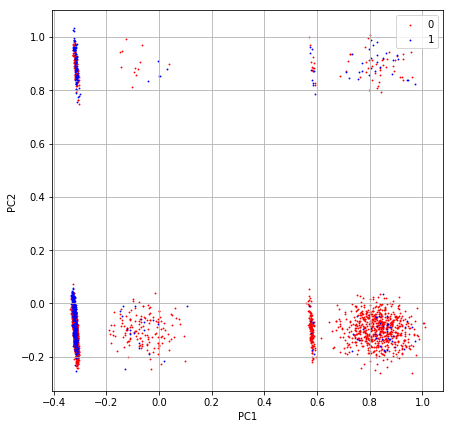

In [177]:
#Reference: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
from matplotlib import pyplot as plt
fig = plt.figure(figsize=[7,7])
ax=fig.add_subplot(111)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
churns=[0,1]
colors = ['red','blue']
for churn, color in zip(churns,colors):
    ax.scatter(full_pca.loc[full_pca.Churn==churn,"PC1"],full_pca.loc[full_pca.Churn==churn,"PC2"], c=color, s=0.7)
ax.legend(churns)
ax.grid()

##### PCA+Logistic

In [191]:
pca_log = LogisticRegression(penalty="l2",C=1,random_state=123)
pca_log.fit(full_pca.iloc[:,0:2],full_pca["Churn"])
print(confusion_matrix(full_pca["Churn"],pca_log.predict(full_pca.iloc[:,0:2])))
print(classification_report(full_pca["Churn"],pca_log.predict(full_pca.iloc[:,0:2])))

[[2794   56]
 [ 433   50]]
             precision    recall  f1-score   support

        0.0       0.87      0.98      0.92      2850
        1.0       0.47      0.10      0.17       483

avg / total       0.81      0.85      0.81      3333



##### PCA+RF(20)+Logistic

In [192]:
pca_rf20 = RandomForestClassifier(n_estimators=1000,max_depth=3)
pca_rf20.fit(full_pca.iloc[:,0:2],full_pca["Churn"])
print(confusion_matrix(full_pca["Churn"],pca_rf20.predict(full_pca.iloc[:,0:2])))
print(classification_report(full_pca["Churn"],pca_rf20.predict(full_pca.iloc[:,0:2])))

[[2822   28]
 [ 399   84]]
             precision    recall  f1-score   support

        0.0       0.88      0.99      0.93      2850
        1.0       0.75      0.17      0.28       483

avg / total       0.86      0.87      0.84      3333



In [197]:
posPreds = full_pca.loc[(full_pca["Churn"]==pca_rf20.predict(full_pca.iloc[:,0:2])) & full_pca["Churn"]==1,:] 
len(posPreds)
posPreds_20 = posPreds.iloc[0:20,:]
len(posPreds_20)
full_pca_rf_20=full_pca.drop(index=posPreds_20.index,axis=0)
len(full_pca_rf_20)

3313

In [200]:
pca_rf_log = LogisticRegression(penalty="l2",C=1)
pca_rf_log.fit(full_pca_rf_20.iloc[:,0:2],full_pca_rf_20["Churn"])
print(confusion_matrix(full_pca_rf_20["Churn"],pca_rf_log.predict(full_pca_rf_20.iloc[:,0:2])))
print(classification_report(full_pca_rf_20["Churn"],pca_rf_log.predict(full_pca_rf_20.iloc[:,0:2])))

[[2832   18]
 [ 438   25]]
             precision    recall  f1-score   support

        0.0       0.87      0.99      0.93      2850
        1.0       0.58      0.05      0.10       463

avg / total       0.83      0.86      0.81      3313

